In [1]:
from google.colab import drive 
drive.mount('/gdrive')

#drive.mount('/content/drive')


Mounted at /gdrive


In [ ]:
!ls '/gdrive/My Drive/datasets/cats_and_dogs_small/train/cats'

In [3]:
import os
import shutil

base_dir = '/gdrive/My Drive/datasets/cats_and_dogs_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')

In [4]:
### 제너레이터 연습 

def test_gen():
  yield 1    #기다려라 
  yield 2    #기다려라 
  yield 3    

gen = test_gen() 

In [5]:
next(gen)

1

In [6]:
next(gen)

2

In [7]:
### 이미지 데이터 제너레이터 
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt 

train_datagen = ImageDataGenerator(rescale=1./255.)
train_generator = train_datagen.flow_from_directory(train_dir, 
                                                    batch_size=20,
                                                    target_size=(150,150), 
                                                    class_mode='binary')

Found 2000 images belonging to 2 classes.


In [8]:
image, label = next(train_generator)

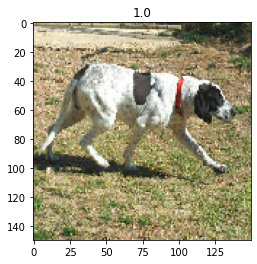

In [9]:
plt.imshow(image[0])
plt.title(label[0])
plt.show()

In [ ]:
plt.figure(figsize=(10,10))

for n in range(20):
  plt.subplot(5,4, n+1)
  plt.imshow(image[n])
  plt.title(label[n])
  plt.axis('off')

In [13]:
train_datagen = ImageDataGenerator(rescale=1./255.)
train_generator = train_datagen.flow_from_directory(train_dir, 
                                                    batch_size=20,
                                                    target_size=(150,150), 
                                                    class_mode='binary')

test_datagen = ImageDataGenerator(rescale=1./255.)
test_generator = test_datagen.flow_from_directory(test_dir, 
                                                  batch_size=20,
                                                  target_size=(150,150),
                                                  class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir, 
                                                        batch_size=20, 
                                                        target_size=(150, 150),
                                                        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [16]:
### 모델링 
from keras import models
from keras import layers 
from keras import optimizers   #고차원 데이터는 학습률을 조정 

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

In [17]:
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=100, 
                              validation_data=validation_generator, 
                              validation_steps=50)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
100/100 [==============================] - 2408s 24s/step - loss: 0.6865 - accuracy: 0.5410 - val_loss: 0.6704 - val_accuracy: 0.5940
Epoch 2/100
100/100 [==============================] - 12s 117ms/step - loss: 0.6509 - accuracy: 0.6055 - val_loss: 0.6404 - val_accuracy: 0.6180
Epoch 3/100
100/100 [==============================] - 12s 116ms/step - loss: 0.5991 - accuracy: 0.6835 - val_loss: 0.6298 - val_accuracy: 0.6300
Epoch 4/100
100/100 [==============================] - 12s 116ms/step - loss: 0.5545 - accuracy: 0.7100 - val_loss: 0.5985 - val_accuracy: 0.6680
Epoch 5/100
100/100 [==============================] - 12s 116ms/step - loss: 0.5252 - accuracy: 0.7355 - val_loss: 0.5918 - val_accuracy: 0.6780
Epoch 6/100
100/100 [==============================] - 12s 117ms/step - loss: 0.4980 - accuracy: 0.7515 - val_loss: 0.5777 - val_accuracy: 0.6910
Epoch 7/100
100/100 [===========================

In [18]:
### 모델 평가 (evaluate_generator)
model.evaluate_generator(test_generator, steps=50)

Instructions for updating:
Please use Model.evaluate, which supports generators.


[2.530332326889038, 0.722000002861023]

In [ ]:
### 모델 저장 
model.save(base_dir, 'cats_dogs_small.h5')

In [ ]:
### 모델 로딩 
#newmodel = model.load(base_dir, 'cats_dogs_small.h5')
#newmodel.predict(새로운이미지)